In [35]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#from analytics_tools.analytics_tools3 import freq_discrete
%matplotlib inline

In [2]:
df = pd.read_excel('Data/churn.xlsx')

In [3]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [4]:
var_disc = [v for v in df.columns if v[:2]=='C_']
var_cont = [v for v in df.columns if v[:2]=='V_']

In [5]:
for v in var_disc:
    df[v] = (df[v]=='Yes').astype(int)

In [6]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,0,1,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,0,1,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,0,0,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,0,0,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,0,0,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [7]:
X = df[var_cont+var_disc].copy()
y = df['TARGET'].copy()

In [36]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=X.columns)
Xs.describe()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,C_IP,C_VMP
count,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03,2.801000e+03
mean,9.639637e-17,-1.014699e-17,-1.572783e-16,-2.435277e-16,4.870554e-16,-5.390587e-17,-5.821834e-16,2.219653e-17,-1.674253e-16,-6.532123e-17,-8.117589e-17,-4.692981e-17
std,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00
min,-2.369856e+00,-5.848147e-01,-2.518984e+00,-2.536501e+00,-2.564577e+00,-2.338728e+00,-2.558717e+00,-1.512782e+00,-2.759771e+00,-1.218398e+00,-3.252743e-01,-6.085657e-01
25%,-7.195674e-01,-5.848147e-01,-7.029726e-01,-7.106973e-01,-7.144849e-01,-7.158022e-01,-7.061962e-01,-6.342204e-01,-6.704865e-01,-4.295092e-01,-3.252743e-01,-6.085657e-01
50%,-8.932706e-04,-5.848147e-01,-9.944857e-03,-1.259585e-02,2.258365e-02,-1.253455e-02,6.672385e-03,-1.949396e-01,1.590919e-03,-4.295092e-01,-3.252743e-01,-6.085657e-01
75%,6.911633e-01,7.637577e-01,7.097378e-01,6.855056e-01,7.101846e-01,6.907331e-01,7.101611e-01,6.836218e-01,6.736683e-01,3.593795e-01,-3.252743e-01,1.643208e+00
max,2.501158e+00,2.636775e+00,2.472439e+00,2.511309e+00,2.476181e+00,2.530049e+00,2.473573e+00,3.758587e+00,2.529186e+00,3.514934e+00,3.074328e+00,1.643208e+00


In [37]:
Xt,Xv,yt,yv = train_test_split(Xs,y,train_size=0.7)

In [38]:
model = SGDClassifier()

In [39]:
%%time
model.fit(Xt,yt)

CPU times: user 3.34 ms, sys: 0 ns, total: 3.34 ms
Wall time: 3.46 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [40]:
def metricas(model,Xt,Xv,yt,yv):
    print "Accuracy_Train %.2f, Accuracy_Validate %.2f "%(accuracy_score(y_pred=model.predict(Xt),y_true=yt),accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print "ROC_Train %.2f, ROC_Validate %.2f "%(roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt),roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))


In [41]:
metricas(model,Xt,Xv,yt,yv)

Accuracy_Train 0.86, Accuracy_Validate 0.86 


AttributeError: probability estimates are not available for loss='hinge'

In [57]:
param_grid = dict(loss = ['hinge', 'log', 'modified_huber','epsilon_insensitive'],
                  penalty= ['l1','l2','elasticnet','none'],
                  alpha = np.arange(0.0001,.001,0.0001),
                  l1_ratio = np.arange(0,1,0.05),
                  learning_rate =['constant','optimal','invscaling'],
                  power_t = np.arange(0.1,1,0.1),
                  eta0 = np.arange(0.1,1,0.1)
                )

In [62]:
grid = RandomizedSearchCV(cv=3,
                          verbose=True,
                          param_distributions=param_grid,
                          estimator=model,
                          n_jobs=-1,
                          n_iter=300,
                          scoring='roc_auc')

In [63]:
%%time
grid.fit(Xs,y)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    4.9s


CPU times: user 2.34 s, sys: 0 ns, total: 2.34 s
Wall time: 9.81 s


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    9.7s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=300, n_jobs=-1,
          param_distributions={'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'loss': ['hinge', 'log', 'modified_huber', 'epsilon_insensitive'], 'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]), 'eta0': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'power... 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]), 'learning_rate': ['constant', 'optimal', 'invscaling']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=True)

In [64]:
grid.best_estimator_

SGDClassifier(alpha=0.0009000000000000001, average=False, class_weight=None,
       epsilon=0.1, eta0=0.30000000000000004, fit_intercept=True,
       l1_ratio=0.1, learning_rate='invscaling', loss='log', n_iter=5,
       n_jobs=1, penalty='elasticnet', power_t=0.7000000000000001,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [65]:
metricas(grid.best_estimator_,Xt,Xv,yt,yv)

Accuracy_Train 0.87, Accuracy_Validate 0.87 
ROC_Train 0.80, ROC_Validate 0.84 


(array([569., 722., 324., 162.,  75.,  47.,  31.,  20.,   6.,   4.]),
 array([0.00721745, 0.08855309, 0.16988873, 0.25122438, 0.33256002,
        0.41389567, 0.49523131, 0.57656695, 0.6579026 , 0.73923824,
        0.82057388]),
 <a list of 10 Patch objects>)

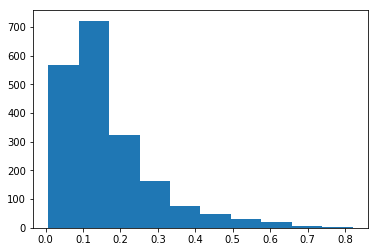

In [66]:
plt.hist(grid.best_estimator_.predict_proba(Xt)[:,1])